In [1]:
from PIL import Image
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import cv2
import os
from image_processing import *

**Parto del pickle de 4000 imagenes Color**

In [ ]:
subset = pd.read_pickle("../output/final_subset_Color.pkl")
subset.head()

In [3]:
subset["label"] = np.where((subset["label"]=="MSI"),0,1)

In [4]:
subset.head()

,label,image_array
0,0,"[[[207, 131, 178], [216, 161, 201], [178, 126,..."
1,0,"[[[216, 136, 187], [205, 121, 173], [195, 108,..."
2,0,"[[[254, 246, 244], [253, 238, 243], [255, 229,..."
3,0,"[[[159, 101, 152], [186, 129, 182], [210, 155,..."
4,0,"[[[173, 105, 156], [203, 141, 182], [203, 159,..."


In [5]:
"""
ksize = 5
subset["image_array_Denoise"] = subset["image_array"].apply(imageDenoiseMEdianBlur, args=(ksize,))
subset.head()
"""

'\nksize = 5\nsubset["image_array_Denoise"] = subset["image_array"].apply(imageDenoiseMEdianBlur, args=(ksize,))\nsubset.head()\n'

In [6]:
"""
img = Image.fromarray(subset["image_array"][1])
plt.imshow(img)
"""

'\nimg = Image.fromarray(subset["image_array"][1])\nplt.imshow(img)\n'

In [7]:
"""
img = Image.fromarray(subset["image_array_Denoise"][1])
plt.imshow(img)
"""

'\nimg = Image.fromarray(subset["image_array_Denoise"][1])\nplt.imshow(img)\n'

**Bajo tamaño imagen**

In [8]:
size = (48,48)
subset["image_array"] = subset["image_array"].apply(sizeImage, args=(size,))

inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inter_cubic
inte

In [9]:
subset

,label,image_array
0,0,"[[[208, 154, 195], [115, 66, 113], [195, 94, 1..."
1,0,"[[[195, 118, 169], [117, 55, 115], [211, 151, ..."
2,0,"[[[247, 210, 231], [254, 227, 239], [251, 213,..."
3,0,"[[[128, 64, 123], [102, 56, 109], [172, 116, 1..."
4,0,"[[[219, 170, 204], [169, 105, 159], [202, 125,..."
...,...,...
3995,1,"[[[220, 179, 204], [199, 164, 193], [172, 111,..."
3996,1,"[[[240, 235, 242], [237, 235, 242], [239, 234,..."
3997,1,"[[[209, 136, 216], [188, 137, 189], [229, 176,..."
3998,1,"[[[211, 126, 173], [221, 148, 191], [213, 140,..."


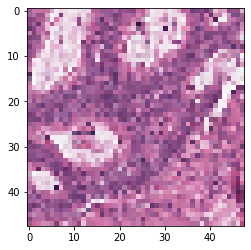

In [15]:
img = Image.fromarray(subset["image_array"][10])
plt.imshow(img)

In [10]:
subset["image_array"][0].shape

(48, 48, 3)

In [16]:
subset_Denoise = subset

In [17]:
subset_Denoise["image_array_Denoise"] = subset_Denoise["image_array"].apply(imageDenoiseMEdianBlur, args=(5,))

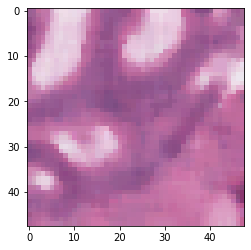

In [18]:
img = Image.fromarray(subset_Denoise["image_array_Denoise"][10])
plt.imshow(img)

In [8]:
"""
img = Image.fromarray(subset["image_array_Denoise"][1])
plt.imshow(img)
"""

'\nimg = Image.fromarray(subset["image_array_Denoise"][1])\nplt.imshow(img)\n'

In [9]:
"""
subset_Denoise = subset[["label","image_array_Denoise"]]
subset_Denoise
"""

'\nsubset_Denoise = subset[["label","image_array_Denoise"]]\nsubset_Denoise\n'

In [10]:
#subset_Denoise.to_pickle("../output/subset_BnW_25x25DeNoise.pkl")

**Normalizo**

In [19]:
subset_Denoise["image_array_Denoise"] = subset_Denoise["image_array_Denoise"].apply(normalizeImage)
#subset_Denoise["image_array_Denoise"] = subset["image_array_Denoise"].apply(normalizeImage)

In [20]:
subset_Denoise
#subset_Denoise.head()

,label,image_array,image_array_Denoise
0,0,"[[[208, 154, 195], [115, 66, 113], [195, 94, 1...","[[[0.8628318584070797, 0.6150442477876106, 0.7..."
1,0,"[[[195, 118, 169], [117, 55, 115], [211, 151, ...","[[[0.9512195121951219, 0.5756097560975609, 0.8..."
2,0,"[[[247, 210, 231], [254, 227, 239], [251, 213,...","[[[0.9686274509803922, 0.8235294117647058, 0.9..."
3,0,"[[[128, 64, 123], [102, 56, 109], [172, 116, 1...","[[[0.5432098765432098, 0.30864197530864196, 0...."
4,0,"[[[219, 170, 204], [169, 105, 159], [202, 125,...","[[[0.9864864864864865, 0.7657657657657657, 0.9..."
...,...,...,...
3995,1,"[[[220, 179, 204], [199, 164, 193], [172, 111,...","[[[0.8906882591093117, 0.7125506072874493, 0.8..."
3996,1,"[[[240, 235, 242], [237, 235, 242], [239, 234,...","[[[0.9917355371900827, 0.9710743801652892, 1.0..."
3997,1,"[[[209, 136, 216], [188, 137, 189], [229, 176,...","[[[0.8931623931623932, 0.5811965811965812, 0.9..."
3998,1,"[[[211, 126, 173], [221, 148, 191], [213, 140,...","[[[0.8612244897959184, 0.5142857142857142, 0.7..."


In [21]:
subset_Denoise["image_array_Denoise"][0].shape

(48, 48, 3)

In [22]:
subset_Denoise.to_pickle("../output/subset_Color_48x48NormalizedFilter.pkl")
#subset_Denoise.to_pickle("../output/subset_BnW_25x25DenoiseNormalized.pkl")